### 1.business Understanding

Mall Customer Segmentation:

Let's imagine you're owning a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score, which is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

The main aim of this problem is learning the purpose of the customer segmentation concepts, also known as market basket analysis, trying to understand customers and sepparate them in different groups according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from plotly import tools
import plotly.figure_factory as ff

### 2.Data Understanding

In [2]:
df = pd.read_csv("C:/Users/Admin/Clustering/Kkmeans_clustering_project/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### 2.1 Data Visualization

Annual_income, Spending_score and Age. Gender will only be used to make data sepparation so we can differentiate values for men and women.

###### 2.1.1 Count and plot gender

<AxesSubplot:xlabel='count', ylabel='Genre'>

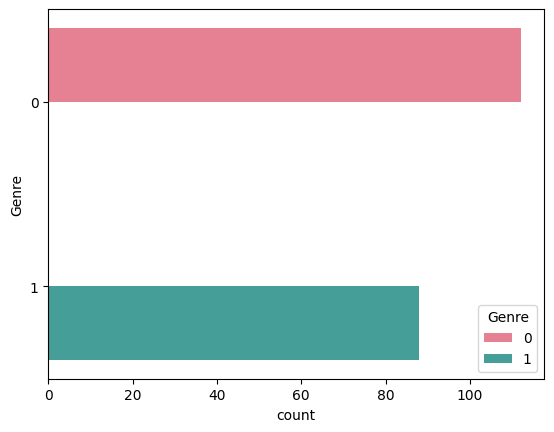

In [8]:
sns.countplot(y = 'Genre', data = df, palette="husl", hue = "Genre")

When we see that there are more women than men

######  2.1.2Age and Annual Income

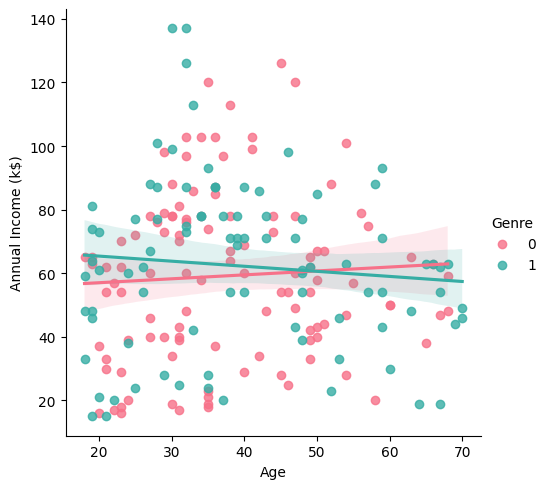

In [8]:
sns.lmplot(x = "Age", y = "Annual Income (k$)", data = df, hue = "Genre" , palette="husl")

Examining the relationship between age and the Annual Income (k$)
People aged between 30, 40, 50 earn more than younger or older people.

######  2.1.3Annual Income and Spending Score

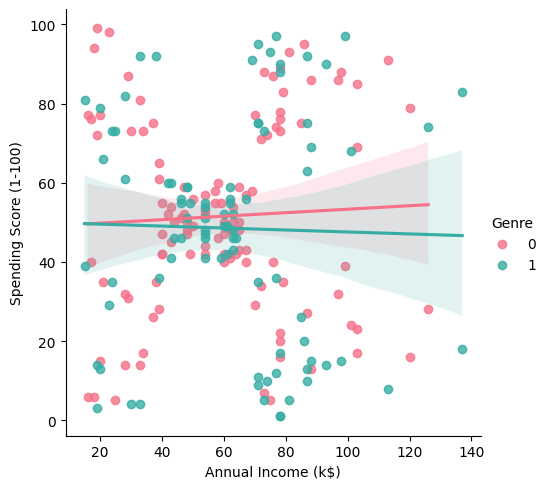

In [11]:
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "Genre" , palette="husl")

We seem to find the majority of people in the middle, people with decent salaries and relatively high spending scores.

###### 2.1.4 Age and Spending Score

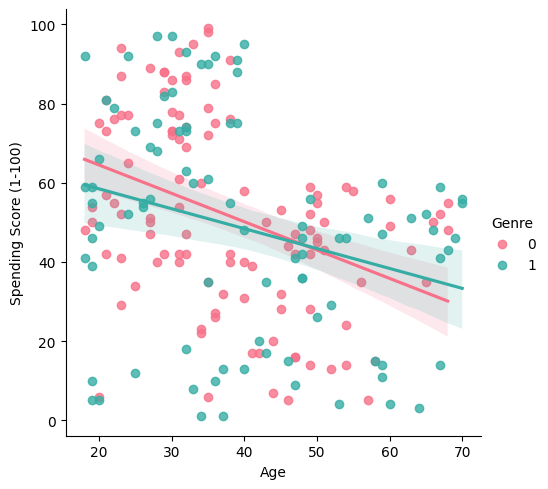

In [12]:
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = df,hue = "Genre" , palette="husl")

Young people tend to spend much more than older people.

### 3.Data Preparation

###### 3.1 Data Cleaning

###### 3.1.1 checking null values

In [9]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

###### 3.1.2 Replacing objects for numerical values

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [11]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### 4.Modeling

###### 4.1 Selecting Number of Clusters 

 we are going to use the Elbow Method.
 
 The elbow method is used to determine the optimal number of clusters in k-means clustering

In [12]:
data  = df.loc[:,["Annual Income (k$)", "Spending Score (1-100)"]].values

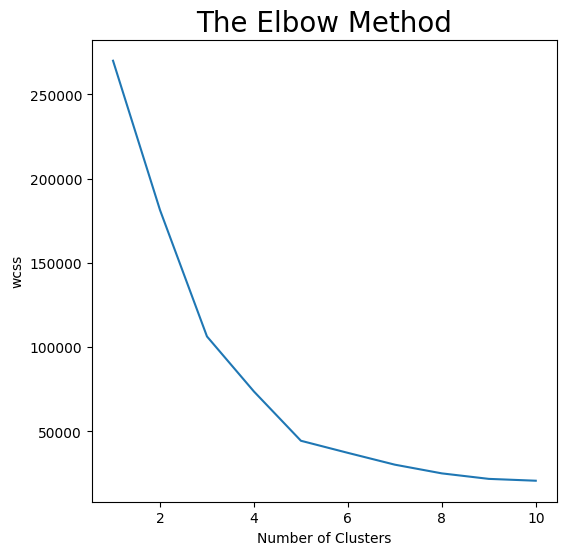

In [13]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(data)
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (6, 6)    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()    
    

result: approximately, where the number of clusters is equal to 5

###### 4.2 Build Model

In [14]:
model = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = model.fit_predict(data)

In [15]:
df['cluster'] = model.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,3
2,3,0,20,16,6,4
3,4,0,23,16,77,3
4,5,0,31,17,40,4


In [18]:
#model.labels_

In [17]:
centers = model.cluster_centers_
centers

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

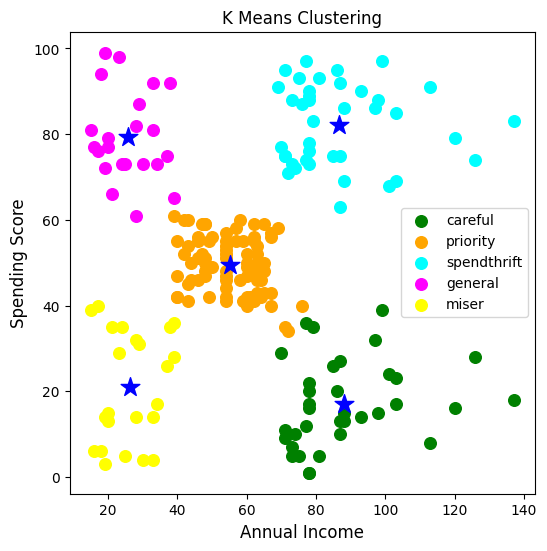

In [19]:
from sklearn.cluster import AgglomerativeClustering
plt.scatter(data[ymeans == 0, 0], data[ymeans == 0, 1], s = 70, c = 'green', label = 'careful' )
plt.scatter(data[ymeans == 1, 0], data[ymeans == 1, 1], s = 70, c = 'orange', label = 'priority')
plt.scatter(data[ymeans == 2, 0], data[ymeans == 2, 1], s = 70, c = 'cyan', label = 'spendthrift')
plt.scatter(data[ymeans== 3, 0] , data[ymeans == 3, 1], s = 70, c = 'magenta', label = 'general')
plt.scatter(data[ymeans == 4, 0], data[ymeans == 4, 1], s = 70, c = 'yellow', label = 'miser')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s =200,marker='*', c = 'blue')

plt.rcParams['figure.figsize'] = (16, 8)
plt.title('K Means Clustering', fontsize = 12)
plt.xlabel('Annual Income' , fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.legend()
plt.show()

According to my intuition, looking at the above clustering chart between the customers' income and their respective spending scores, I collected them into 5 different categories called regular customers, priority customers, stingy customers, careful customers and careful metrics. Then after getting the results, we can adopt different marketing strategies and policies to optimize customer spending points in the mall.

### 5.EVALUATION

We use Silhoutte to evaluate the clustering quality of the matrix

In [20]:
from sklearn import metrics
score = metrics.silhouette_score(data, model.labels_)
print("Score = ", score)

Score =  0.553931997444648
